## In this project our target is to predict if a person will survive or not according to the given parameters

#### all classifires :- random forest, logistic regresson,knn,decision tree, 

#### OverviewThe sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

#### One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

## In this challenge, we target to complete the analysis of what sorts of people were likely to survive.

https://www.kaggle.com/c/titanic/data

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(12, 10)})

# Loading Dataset

In [88]:
data = pd.read_csv('titanic_data.csv')


In [89]:
data.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Types of Features :

Categorical - Sex, and Embarked.
Continuous - Age, Fare
Discrete - SibSp, Parch.
Alphanumeric - Cabin

In [90]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [91]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [92]:
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Numerical Value Analysis 
### heatmap

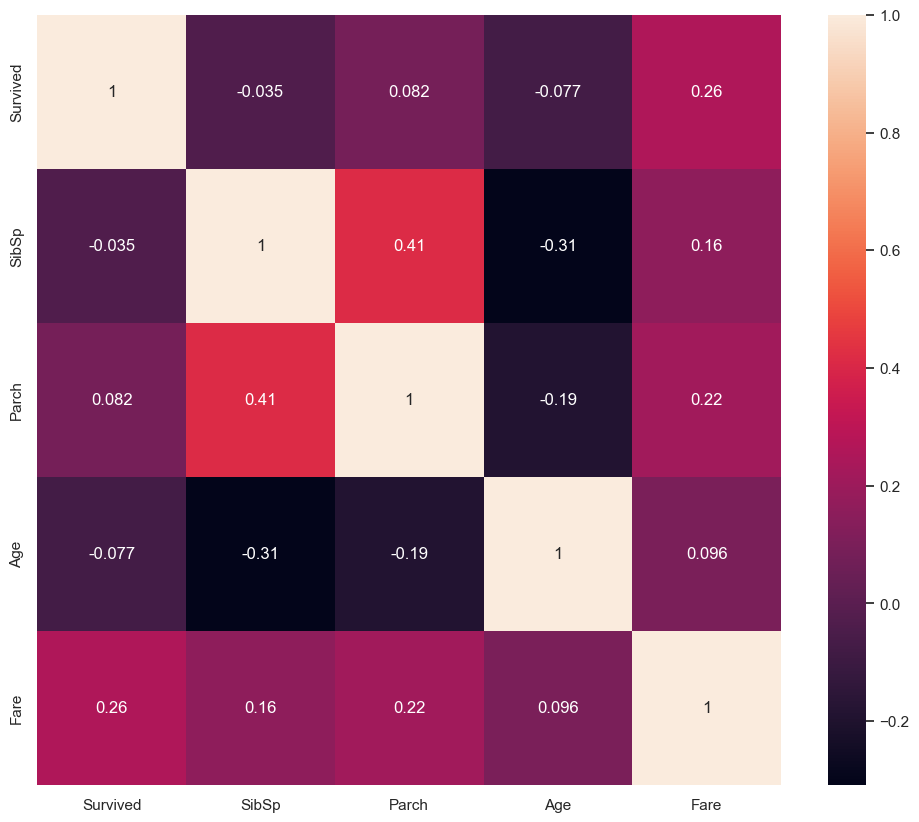

In [93]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(data[["Survived","SibSp","Parch","Age","Fare"]].corr(), annot=True)


# Conclusion :

### Only Fare feature seems to have a significative correlation with the survival probability.

### It doesn't mean that the other features are not usefull. Subpopulations in these features can be correlated with the survival. To determine this, we need to explore in detail these features

#  sibsp - Number of siblings / spouses aboard the Titanic

In [94]:
data['SibSp'].nunique()


7

In [95]:
data['SibSp'].unique()


array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

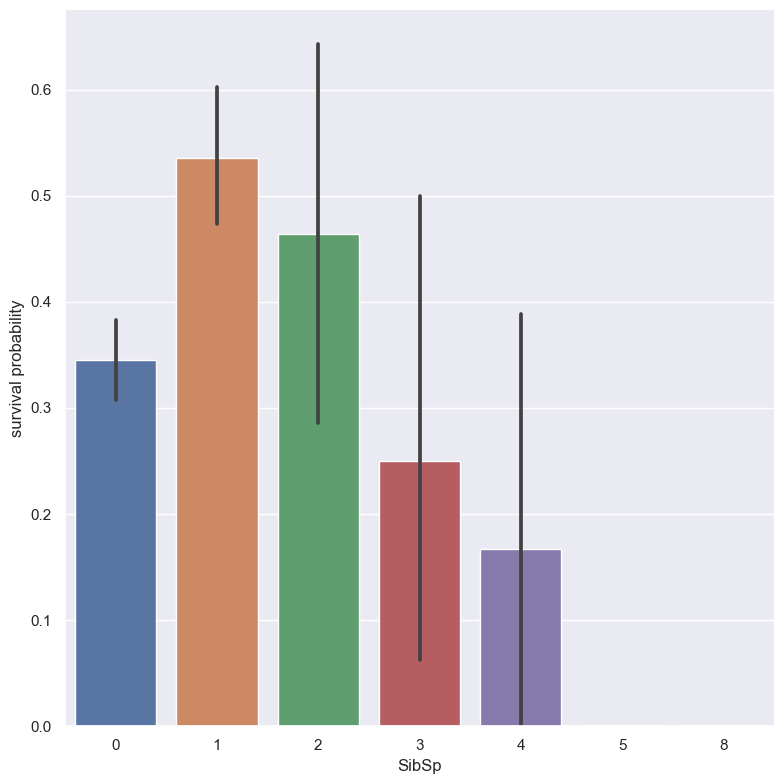

In [130]:
bargraph_sibsp = sns.factorplot(x = "SibSp", y = "Survived", data = data, kind = "bar", size = 8)
bargraph_sibsp = bargraph_sibsp.set_ylabels("survival probability")


####  t seems that passengers having a lot of siblings/spouses have less chance to survive.


#### Single passengers (0 SibSP) or with two other persons (SibSP 1 or 2) have more chance to survive.

# Age

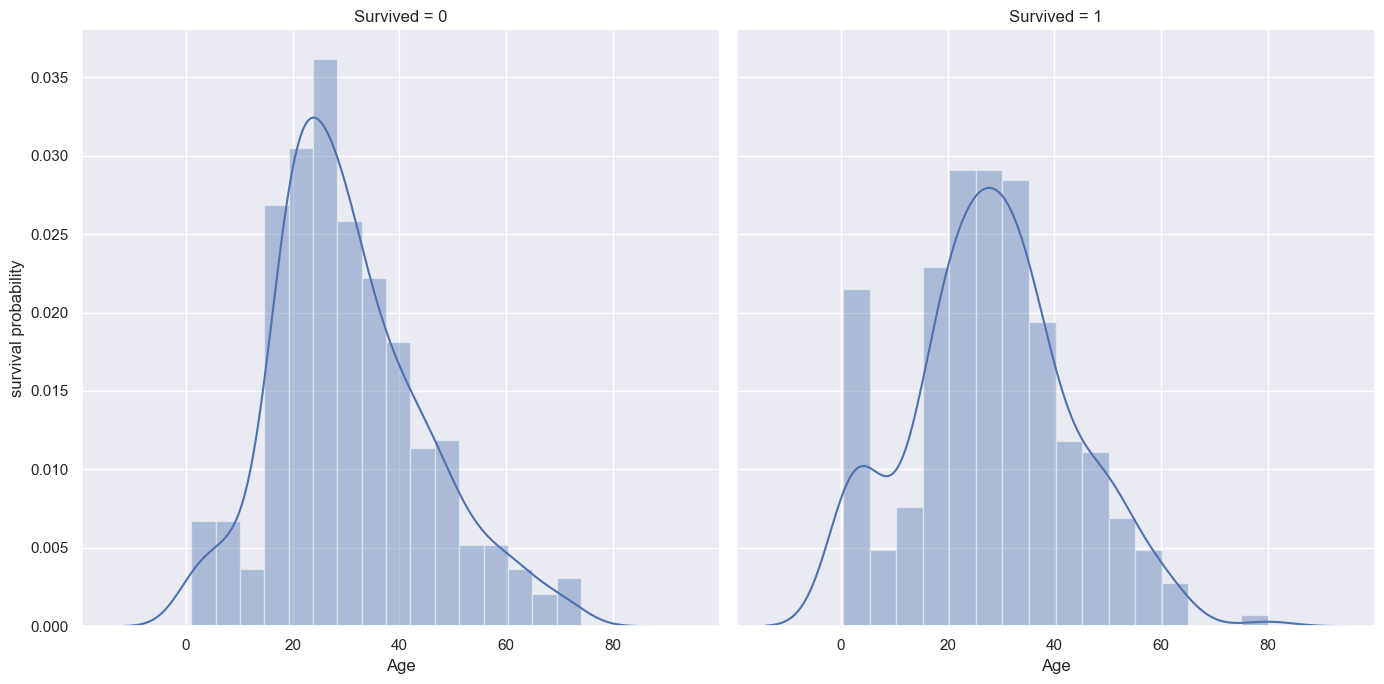

In [97]:
age_visual = sns.FacetGrid(data, col = 'Survived', size=7)
age_visual = age_visual.map(sns.distplot, "Age")
age_visual = age_visual.set_ylabels("survival probability")

#### Age distribution seems to be a tailed distribution, maybe a gaussian distribution.

#### We notice that age distributions are not the same in the survived and not survived subpopulations. Indeed, there is a peak corresponding to young passengers, that have survived. We also see that passengers between 60-80 have less survived.

#### So, even if "Age" is not correlated with "Survived", we can see that there is age categories of passengers that of have more or less chance to survive.

#### It seems that very young passengers have more chance to survive.

# Sex

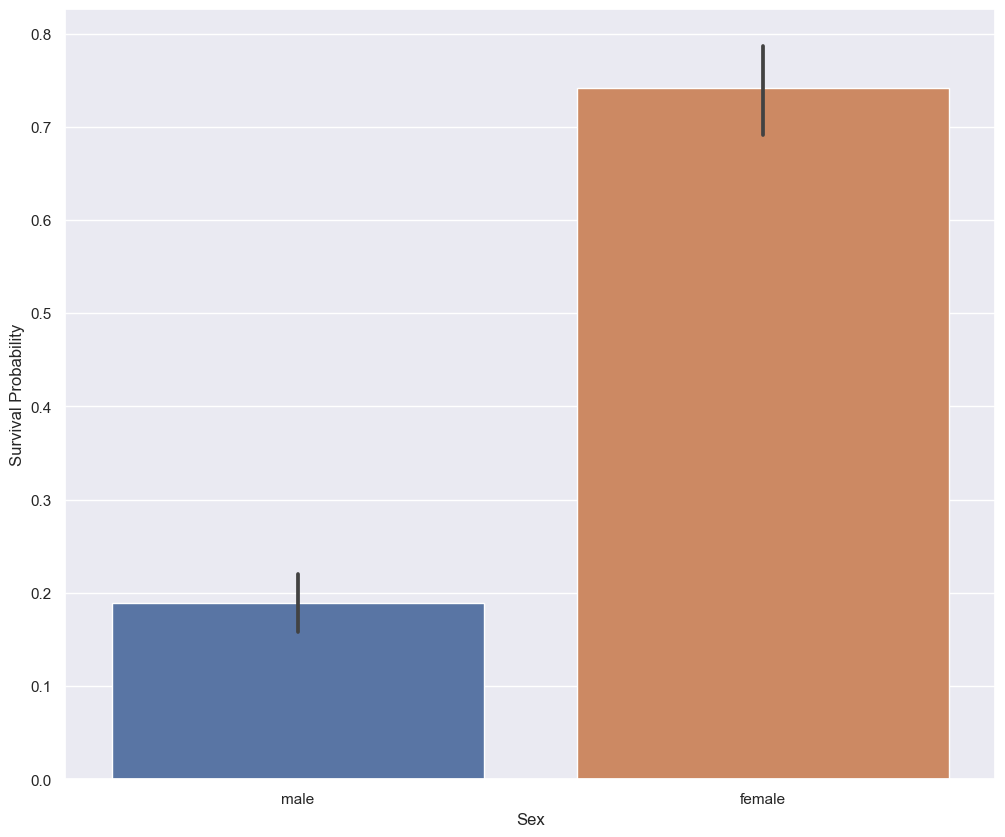

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
age_plot = sns.barplot(x = "Sex",y = "Survived", data = data)
age_plot = age_plot.set_ylabel("Survival Probability")

In [99]:
data[["Sex","Survived"]].groupby('Sex').mean()


,Survived
Sex,
female,0.742038
male,0.188908


##### It is clearly obvious that Male have less chance to survive than Female. So Sex, might play an important role in the prediction of the survival. For those who have seen the Titanic movie (1997), I am sure, we all remember this sentence during the evacuation - Women and children first

# Preparing data + Feature Engineering

In [100]:
data = pd.read_csv('titanic_data.csv')

In [101]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [103]:
data["Age"].isnull().sum()

177

###### There aer total 177 null values in the age column , so instead of filling them with the mean, we will fill them an number between range (standar deviation-mean) to (standard deviation+ mean) , because most of values lies between thiis range in normal distribution

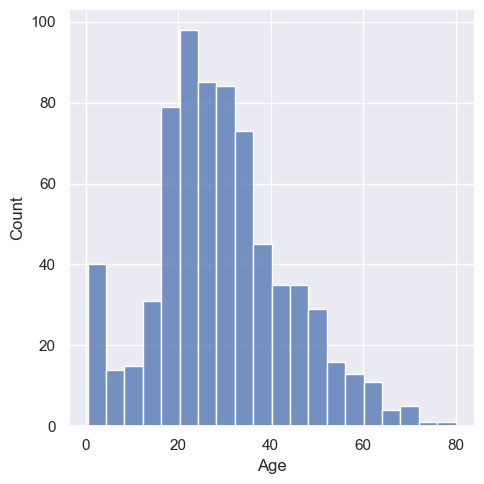

In [104]:
sns.displot(data["Age"])   # following normal distribution

In [105]:
mean = data["Age"].mean()
std = data["Age"].std()
is_null = data["Age"].isnull().sum()
    

In [106]:
print(mean,std,is_null)

29.69911764705882 14.526497332334044 177


In [107]:
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)

In [108]:
rand_age

array([40, 15, 42, 17, 18, 16, 22, 32, 18, 21, 16, 29, 18, 17, 27, 19, 15,
       42, 28, 25, 21, 20, 42, 35, 41, 43, 32, 38, 27, 15, 26, 21, 43, 21,
       40, 17, 22, 22, 27, 18, 32, 36, 42, 20, 34, 28, 25, 31, 18, 15, 26,
       30, 28, 16, 38, 26, 43, 38, 26, 41, 32, 36, 15, 26, 43, 42, 21, 31,
       23, 19, 29, 32, 29, 39, 34, 35, 27, 23, 31, 23, 32, 27, 16, 26, 35,
       33, 40, 17, 21, 33, 27, 37, 29, 43, 22, 19, 25, 37, 25, 23, 29, 28,
       20, 41, 16, 39, 16, 28, 15, 33, 40, 22, 32, 15, 41, 37, 35, 27, 22,
       28, 23, 24, 34, 19, 37, 26, 25, 41, 27, 26, 31, 31, 28, 17, 20, 43,
       33, 37, 30, 35, 16, 32, 26, 17, 27, 17, 36, 30, 41, 16, 17, 26, 27,
       25, 19, 30, 36, 42, 43, 29, 27, 30, 31, 29, 15, 26, 24, 25, 38, 40,
       25, 15, 25, 29, 38, 42, 19])

In [109]:
age_slice = data["Age"].copy() #taking age copy in a variable
age_slice[np.isnan(age_slice)] = rand_age # index at which age has null , assign with randum values

data["Age"] = age_slice # updte the age colmn

In [110]:
data["Age"].isnull().sum()


0

### No null values

In [111]:

# non important values are droped out

In [112]:
col_to_drop = ['PassengerId','Cabin', 'Ticket','Name']
data.drop(col_to_drop, axis=1, inplace = True)

In [113]:
data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [114]:
#Fill Embarked with 'S' i.e. the most frequent values
data["Embarked"] = data["Embarked"].fillna("S")

In [115]:
# conveting the categorial into the integer

In [116]:
genders = {"male": 0, "female": 1}
data['Sex'] = data['Sex'].map(genders)

In [117]:
ports = {"S": 0, "C": 1, "Q": 2}

data['Embarked'] = data['Embarked'].map(ports)

In [118]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# Spliting the data

In [119]:
# input and output data

x = data.drop(data.columns[[0]], axis = 1)
y = data['Survived']

In [120]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [121]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [122]:
# splitting into training and testing data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state =0)


# Training and prediction

In [123]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state = 0 )

In [124]:
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [125]:
logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [126]:
# finding accuracy
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)


In [127]:
print ("Logistic Regression accuracy : ", round(logreg_acc*100, 2))
print ("Support Vector accuracy      : ", round(svc_classifier_acc*100, 2))
print ("Decision Tree accuracy       : ", round(dt_classifier_acc*100, 2))
print ("K-NN Classifier accuracy     : ", round(knn_classifier_acc*100, 2))
print ("Random Forest accuracy       : ", round(rf_classifier_acc*100, 2))

Logistic Regression accuracy :  80.22
Support Vector accuracy      :  71.64
Decision Tree accuracy       :  75.0
K-NN Classifier accuracy     :  70.15
Random Forest accuracy       :  82.46
